In [1]:

import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

C:\Users\princ\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
len(label)

10

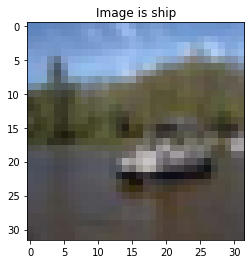

In [6]:
import matplotlib.pyplot as plt
i = np.random.randint(1,50000)
op = label[y_train[i][0]]
plt.imshow(x_train[i])
plt.title(f'Image is {op}')
plt.show()

In [7]:
x_train =x_train/255
x_test = x_test/255

In [8]:
32*32*3

3072

In [9]:

# Build a ANN model

ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
ann.add(tf.keras.layers.Dense(2048,activation='relu'))
ann.add(tf.keras.layers.Dense(1024,activation='relu'))
ann.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


In [11]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8777 - accuracy: 0.3257 - val_loss: 1.6920 - val_accuracy: 0.3877
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6647 - accuracy: 0.4043 - val_loss: 1.6201 - val_accuracy: 0.4243
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.5816 - accuracy: 0.4326 - val_loss: 1.5676 - val_accuracy: 0.4367
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5307 - accuracy: 0.4519 - val_loss: 1.6192 - val_accuracy: 0.4324
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4925 - accuracy: 0.4650 - val_loss: 1.5452 - val_accuracy: 0.4469
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4628 - accuracy: 0.4778 - val_loss: 1.5392 - val_accuracy: 0.4507
Epoch 7/10
1563/1563 [==============================] - 109s 69ms/step - loss: 1.4419 - accuracy: 0.4829 - val_loss: 1.5206 

In [13]:
t1=time.time()-t0
print("ann_exe_time", t1)

ann_exe_time 874.8115274906158


In [ ]:
# Building a CNN model

In [14]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(64,activation='relu'))
cnn1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 512)              

In [15]:
cnn1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [16]:
cnn1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 55s 34ms/step - loss: 1.5893 - accuracy: 0.4173 - val_loss: 1.3110 - val_accuracy: 0.5245
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2626 - accuracy: 0.5479 - val_loss: 1.1665 - val_accuracy: 0.5853
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1242 - accuracy: 0.6000 - val_loss: 1.0927 - val_accuracy: 0.6037
Epoch 4/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0312 - accuracy: 0.6350 - val_loss: 1.1418 - val_accuracy: 0.5842
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9719 - accuracy: 0.6578 - val_loss: 0.9605 - val_accuracy: 0.6616
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9201 - accuracy: 0.6757 - val_loss: 0.9728 - val_accuracy: 0.6606
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8756 - accuracy: 0.6910 - val_loss: 0.9614 -